# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
btc_value = btc_data['data']['1']['quotes']['USD']['price']
btc_value

# Fetch current ETH price
eth_data = requests.get(eth_url).json()
eth_value = eth_data['data']['1027']['quotes']['USD']['price']
eth_value


# Compute current value of my crpto
my_btc_value = my_btc * btc_value
my_eth_value = my_eth * eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value}")

The current value of your 1.2 BTC is $44989.2
The current value of your 5.3 ETH is $10792.231


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2023-11-17", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
port_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Reorganize the DataFrame
# Separate ticker data
spy = port_df[port_df['symbol']=='SPY'].drop('symbol', axis=1)
agg = port_df[port_df['symbol']=='AGG'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
spy_agg = pd.concat([spy, agg],axis=1, keys=['spy','agg'])

# Preview DataFrame
spy_agg

spy                                      \
                            close    high     low trade_count    open   
timestamp                                                               
2023-11-17 05:00:00+00:00  450.79  451.42  449.29      439332  450.24   

                                                   agg                 \
                             volume        vwap  close   high     low   
timestamp                                                               
2023-11-17 05:00:00+00:00  83183079  450.530471  95.25  95.36  95.025   

                                                                  
                          trade_count   open   volume       vwap  
timestamp                                                         
2023-11-17 05:00:00+00:00       27266  95.21  9244030  95.213371

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(spy_agg['agg']['close'])
spy_close_price = float(spy_agg['spy']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $95.25
Current SPY closing price: $450.79


In [10]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value}")

The current value of your 50 SPY shares is $22539.5
The current value of your 200 AGG shares is $19050.0


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = my_btc_value + my_eth_value
shares = my_spy_value + my_agg_value

# Create savings DataFrame
df_savings = pd.DataFrame([crypto, shares], columns=['amount'], index=['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,55781.431
shares,41589.500


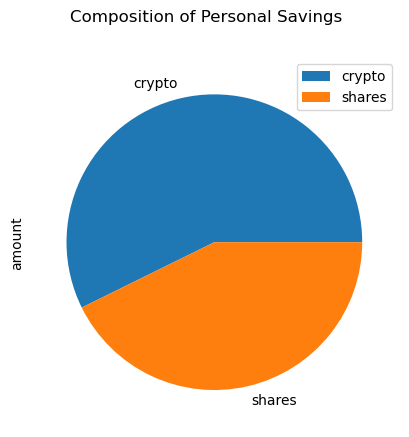

In [12]:
# Plot savings pie chart
df_savings.plot.pie(title = 'Composition of Personal Savings', subplots=True);

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto + shares
total_savings

# Validate saving health
if total_savings > emergency_fund :
    print('Congratulations for having more than enough money saved to build an emergency fund!')
elif total_savings == emergency_fund :
    print('Congratulations you have just reached you financial goal to start an emergency fund!')
elif total_savings < emergency_fund :
    print(f'You are currently ${emergency_fund - total_savings} away from having enough money to start an emergency fund')

Congratulations for having more than enough money saved to build an emergency fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-11-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-11-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
port_5y = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
spy_5y = port_5y[port_5y['symbol']=='SPY'].drop('symbol', axis=1)
agg_5y = port_5y[port_5y['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
spy_agg_5y = pd.concat([spy_5y, agg_5y],axis=1, keys=['spy','agg'])

# Display sample data
spy_agg_5y.head()

spy                                      \
                            close    high     low trade_count    open   
timestamp                                                               
2018-11-01 04:00:00+00:00  273.37  273.73  270.38      460604  271.60   
2018-11-02 04:00:00+00:00  271.80  275.23  269.59      612382  274.75   
2018-11-05 05:00:00+00:00  273.47  274.01  271.35      319136  272.44   
2018-11-06 05:00:00+00:00  275.11  275.30  273.25      285373  273.32   
2018-11-07 05:00:00+00:00  281.00  281.10  277.08      437245  277.56   

                                                     agg                      \
                              volume        vwap   close      high       low   
timestamp                                                                      
2018-11-01 04:00:00+00:00  101051621  272.367233  104.34  104.4100  104.2100   
2018-11-02 04:00:00+00:00  124249254  272.157261  104.03  104.2900  103.9400   
2018-11-05 05:00:00+00:00   69873066  272.869097  104.10  104.1700  104.0700   
2018-11-06 05:00:00+00:00   60827084  274.496925  104.11  104.1699  104.0635   
2018-11-07 05:00:00+00:00  104778528  279.401829  104.20  104.3600  104.1400   

                                                                    
                          trade_count    open   volume        vwap  
timestamp                                                           
2018-11-01 04:00:00+00:00       21872  104.22  8799790  104.334351  
2018-11-02 04:00:00+00:00       15973  104.25  4620690  104.066112  
2018-11-05 05:00:00+00:00       11362  104.14  3951758  104.109446  
2018-11-06 05:00:00+00:00       10446  104.09  2672159  104.109635  
2018-11-07 05:00:00+00:00       15114  104.25  5003115  104.234319

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 500

mc_spy_agg = MCSimulation(
    portfolio_data = spy_agg_5y,
    weights = [.6, .4],
    num_simulation = num_sims,
    num_trading_days = 252*30
)


In [17]:
# Printing the simulation input data
mc_spy_agg.portfolio_data.head()

spy                                      \
                            close    high     low trade_count    open   
timestamp                                                               
2018-11-01 04:00:00+00:00  273.37  273.73  270.38      460604  271.60   
2018-11-02 04:00:00+00:00  271.80  275.23  269.59      612382  274.75   
2018-11-05 05:00:00+00:00  273.47  274.01  271.35      319136  272.44   
2018-11-06 05:00:00+00:00  275.11  275.30  273.25      285373  273.32   
2018-11-07 05:00:00+00:00  281.00  281.10  277.08      437245  277.56   

                                                                  agg  \
                              volume        vwap daily_return   close   
timestamp                                                               
2018-11-01 04:00:00+00:00  101051621  272.367233          NaN  104.34   
2018-11-02 04:00:00+00:00  124249254  272.157261    -0.005743  104.03   
2018-11-05 05:00:00+00:00   69873066  272.869097     0.006144  104.10   
2018-11-06 05:00:00+00:00   60827084  274.496925     0.005997  104.11   
2018-11-07 05:00:00+00:00  104778528  279.401829     0.021410  104.20   

                                                                            \
                               high       low trade_count    open   volume   
timestamp                                                                    
2018-11-01 04:00:00+00:00  104.4100  104.2100       21872  104.22  8799790   
2018-11-02 04:00:00+00:00  104.2900  103.9400       15973  104.25  4620690   
2018-11-05 05:00:00+00:00  104.1700  104.0700       11362  104.14  3951758   
2018-11-06 05:00:00+00:00  104.1699  104.0635       10446  104.09  2672159   
2018-11-07 05:00:00+00:00  104.3600  104.1400       15114  104.25  5003115   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-11-01 04:00:00+00:00  104.334351          NaN  
2018-11-02 04:00:00+00:00  104.066112    -0.002971  
2018-11-05 05:00:00+00:00  104.109446     0.000673  
2018-11-06 05:00:00+00:00  104.109635     0.000096  
2018-11-07 05:00:00+00:00  104.234319     0.000864

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc_spy_agg.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998141,0.998207,0.997228,0.997738,1.003512,0.997186,1.005443,0.993300,1.003012,0.993412,...,0.987745,1.004780,0.982891,0.999079,0.980932,1.004721,0.995768,0.999531,1.002028,1.010541
2,0.998135,1.008805,1.003755,1.003482,1.013179,1.018756,1.012821,1.000487,0.990708,1.011257,...,0.982383,1.000704,0.959866,0.998421,0.977858,1.005389,0.995588,0.995979,1.011564,1.007246
3,0.992165,1.015653,1.014868,1.004450,1.026141,1.018888,1.008321,1.001970,0.975325,1.018081,...,0.977307,1.005332,0.960421,1.006265,0.980167,0.996228,0.983413,0.989299,1.015268,1.013966
4,0.992205,1.007340,1.015024,0.994291,1.019195,1.010433,1.004258,1.012974,0.964912,1.024867,...,0.987082,1.008459,0.952151,1.018076,0.996447,1.009139,0.980161,0.997443,1.013040,1.003480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1.823008,3.240722,1.802483,4.794628,4.448299,5.199890,3.358958,8.663658,1.394179,1.924528,...,2.079583,29.072998,5.043361,0.993859,2.577589,9.534215,5.758793,4.252935,5.189628,1.074775
7557,1.803295,3.267175,1.788260,4.755368,4.505031,5.207989,3.304477,8.788263,1.377929,1.921398,...,2.109283,28.999546,5.045789,0.996878,2.578055,9.471661,5.813699,4.268065,5.187520,1.075415
7558,1.803176,3.244632,1.777940,4.667609,4.527154,5.168569,3.289848,8.916267,1.380296,1.933789,...,2.110538,28.756376,5.027476,0.993019,2.555634,9.570376,5.771670,4.288223,5.230931,1.075477
7559,1.811889,3.246523,1.776003,4.710701,4.563781,5.209359,3.285242,8.949240,1.384492,1.926343,...,2.092528,28.891293,4.967526,1.006352,2.548413,9.623997,5.691667,4.280922,5.279250,1.082541


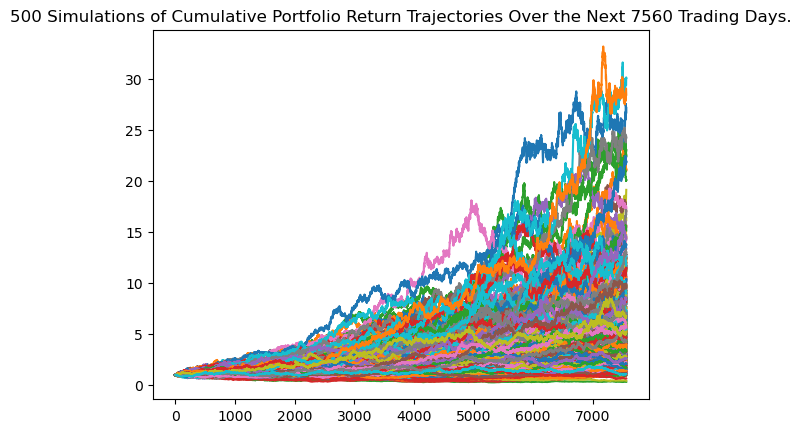

In [19]:
# Plot simulation outcomes
spg_agg_line_mc = mc_spy_agg.plot_simulation()
spg_agg_line_mc;

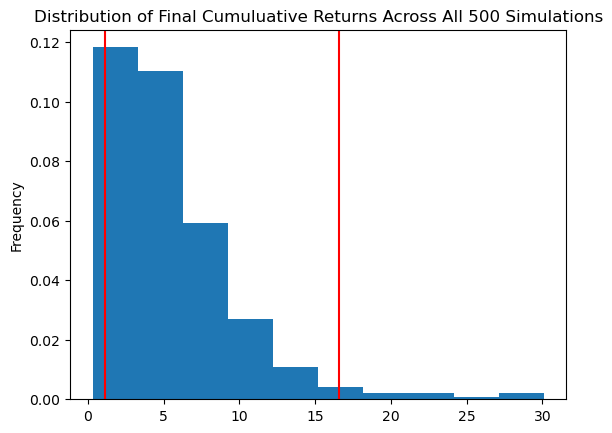

In [20]:
# Plot probability distribution and confidence intervals
spy_agg_dist = mc_spy_agg.plot_distribution()
spy_agg_dist;

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
spy_agg_summary = mc_spy_agg.summarize_cumulative_return()

# Print summary statistics
print(spy_agg_summary)

count           500.000000
mean              5.509304
std               4.255065
min               0.319706
25%               2.548502
50%               4.234415
75%               7.029666
max              30.091371
95% CI Lower      1.156560
95% CI Upper     16.570868
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(spy_agg_summary[8]*initial_investment,2)
ci_upper = round(spy_agg_summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $23131.21 and $331417.36


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(spy_agg_summary[8]*initial_investment,2)
ci_upper = round(spy_agg_summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $34696.81 and $497126.04


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
#adjusting for riskier profile with stronger spy weighing
num_sims = 500

mc_spy_agg_5y = MCSimulation(
    portfolio_data = spy_agg_5y,
    weights = [.8, .2],
    num_simulation = num_sims,
    num_trading_days = 252*5
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
mc_spy_agg_5y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.989725,1.016404,0.997448,0.995938,0.997385,1.013199,0.995744,1.008321,1.017298,0.999254,...,1.007411,0.995781,1.017546,1.009415,1.009541,0.988596,0.995482,0.998568,0.983613,1.003415
2,1.011714,1.010175,0.984299,0.983857,1.000192,1.009409,1.001184,1.025158,0.992021,0.989806,...,1.031938,0.990087,1.028253,1.030172,1.017072,0.995369,1.008233,0.996029,0.987242,0.998981
3,1.015204,1.007005,0.983727,0.988095,0.993883,0.994166,1.014502,1.035224,1.007499,0.970320,...,1.034486,1.002978,1.040181,1.025602,0.998065,0.987624,1.014011,1.000422,0.976440,0.989139
4,1.005267,1.017343,0.986659,1.009893,0.991754,1.003733,1.025274,1.034097,1.003796,0.980058,...,1.022972,1.012605,1.050895,1.046551,1.005200,0.982916,1.000177,1.014740,0.981325,1.004390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.852742,1.453559,1.841384,3.211172,1.706166,2.124508,1.908209,1.487905,1.302133,1.671158,...,1.228620,1.431222,0.536500,1.128802,1.540605,1.505914,1.097256,0.598964,1.269813,1.762700
1257,1.819711,1.471735,1.885883,3.233010,1.703831,2.124650,1.954394,1.483228,1.323832,1.680907,...,1.240691,1.440775,0.533797,1.142048,1.519525,1.504237,1.105526,0.598234,1.253852,1.781468
1258,1.841395,1.459006,1.863527,3.255635,1.689748,2.133442,1.973306,1.467152,1.326254,1.660419,...,1.223936,1.432605,0.542395,1.126081,1.500256,1.497190,1.104441,0.597753,1.242837,1.790282
1259,1.795257,1.481955,1.884389,3.266844,1.724759,2.136660,1.978553,1.455716,1.301036,1.676364,...,1.209982,1.429141,0.548550,1.123124,1.509730,1.502125,1.086980,0.594222,1.253550,1.819393


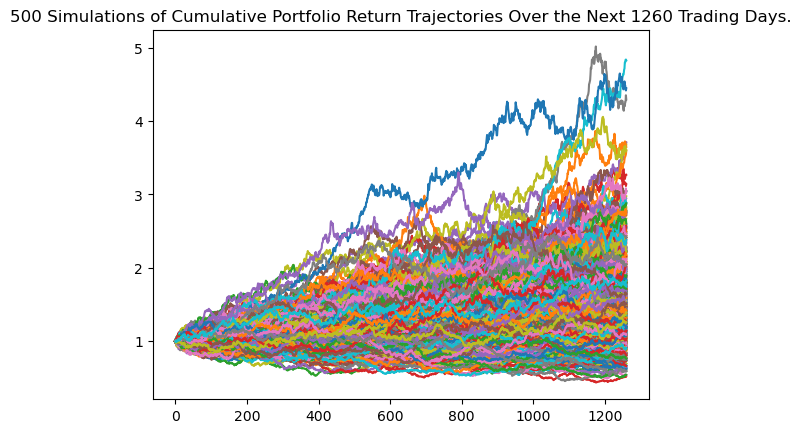

In [26]:
# Plot simulation outcomes
mc_spy_agg_5y.plot_simulation();

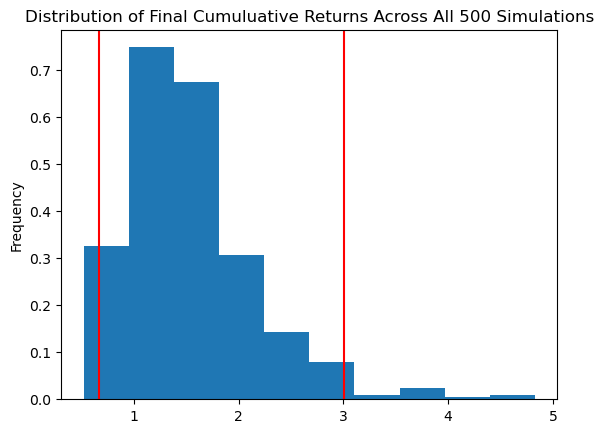

In [27]:
# Plot probability distribution and confidence intervals
mc_spy_agg_5y.plot_distribution();

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
spy_agg_summary_5y = mc_spy_agg_5y.summarize_cumulative_return()

# Print summary statistics
print(spy_agg_summary_5y)

count           500.000000
mean              1.538301
std               0.622462
min               0.525192
25%               1.086310
50%               1.451919
75%               1.808946
max               4.826441
95% CI Lower      0.664526
95% CI Upper      3.004348
Name: 1260, dtype: float64


In [29]:
# Set initial investment
initial_investment_5y = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_5y = round(spy_agg_summary_5y[8]*initial_investment_5y,2)
ci_upper_5y = round(spy_agg_summary_5y[9]*initial_investment_5y,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_5y} and ${ci_upper_5y}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $13290.52 and $60086.95


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
num_sims = 500

mc_spy_agg_10y = MCSimulation(
    portfolio_data = spy_agg_5y,
    weights = [.6, .4],
    num_simulation = num_sims,
    num_trading_days = 252*10
)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
mc_spy_agg_10y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000802,1.007328,0.984237,0.999455,0.987357,1.002366,0.981224,1.013288,0.997123,1.012918,...,0.994104,0.992559,1.001713,1.014980,1.014561,1.011197,1.012492,0.994060,0.992536,0.997397
2,0.989301,1.011639,0.974220,0.991689,0.988704,0.995309,0.996517,1.005520,1.001493,1.011849,...,0.989783,1.010836,1.007612,1.006495,1.011396,1.013067,1.009445,0.984550,1.005902,0.997146
3,0.990481,1.008652,0.971921,0.986421,0.984508,1.003693,0.982894,0.995738,0.995941,1.008028,...,0.986215,0.992354,1.015306,1.022993,1.000668,0.990443,1.006148,0.993673,1.000481,0.995228
4,0.998100,1.015001,0.989436,0.988346,0.988257,1.000943,0.978469,1.002341,0.986935,1.006532,...,0.986951,0.984922,1.018827,1.020154,1.016710,0.985217,1.015012,1.002907,1.006153,0.976410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.354570,3.599969,0.899892,1.040946,0.925999,1.098612,0.940926,1.301931,1.299292,1.529655,...,0.744627,2.654481,1.177959,2.041847,1.666576,2.051357,5.104992,1.724549,3.260125,1.351709
2517,2.367673,3.655727,0.893691,1.038914,0.922415,1.090479,0.938626,1.306680,1.296562,1.528685,...,0.743709,2.649585,1.165938,2.052481,1.652310,2.044386,5.140178,1.726974,3.223953,1.355797
2518,2.376178,3.635197,0.885031,1.048049,0.921745,1.109176,0.928679,1.319100,1.293080,1.521540,...,0.743299,2.671570,1.152962,2.018939,1.648597,2.049984,5.179864,1.729386,3.219447,1.357772
2519,2.332561,3.621283,0.894488,1.070900,0.916144,1.110183,0.938752,1.320932,1.308367,1.505312,...,0.743388,2.668577,1.161042,2.020320,1.650321,2.064091,5.213090,1.717629,3.192439,1.370254


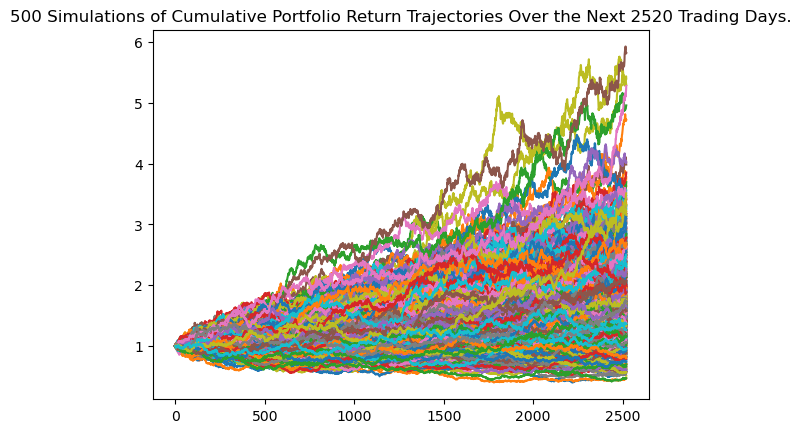

In [32]:
# Plot simulation outcomes
mc_spy_agg_10y.plot_simulation();

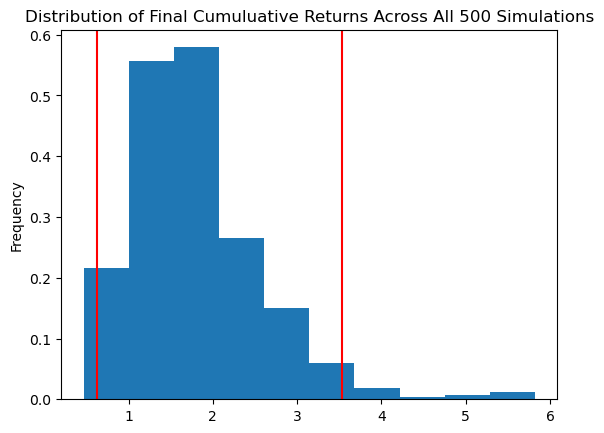

In [33]:
# Plot probability distribution and confidence intervals
mc_spy_agg_10y.plot_distribution();

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
spy_agg_summary_10y = mc_spy_agg_10y.summarize_cumulative_return()

# Print summary statistics
print(spy_agg_summary_10y)

count           500.000000
mean              1.791577
std               0.784517
min               0.469556
25%               1.259097
50%               1.674020
75%               2.167162
max               5.820596
95% CI Lower      0.624990
95% CI Upper      3.536618
Name: 2520, dtype: float64


In [35]:
# Set initial investment
#set higher initial investment with 60/40 portfolio
initial_investment_10y = 35000


# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_10y = round(spy_agg_summary_10y[8]*initial_investment_10y,2)
ci_upper_10y = round(spy_agg_summary_10y[9]*initial_investment_10y,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_10y} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_10y} and ${ci_upper_10y}")

There is a 95% chance that an initial investment of $35000 in the portfolio over the next 10 years will end within in the range of $21874.65 and $123781.62
